In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import calendar

In [4]:
stores=pd.read_csv("C:/Users/rashmis2/Downloads/hackathon/stores.csv")
ext=pd.read_csv(r"C:\Users\rashmis2\Downloads\hackathon\external_data.csv")
sales=pd.read_csv(r"C:\Users\rashmis2\Downloads\hackathon\sales.csv")

In [5]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
dtypes: int64(1), object(1)
memory usage: 848.0+ bytes


In [6]:
ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
 3   Fuel_Price   8190 non-null   float64
 4   PROMO1       4032 non-null   float64
 5   PROMO2       2921 non-null   float64
 6   PROMO3       3613 non-null   float64
 7   PROMO4       3464 non-null   float64
 8   PROMO5       4050 non-null   float64
 9   CPI          7605 non-null   float64
 10  IsHoliday    8190 non-null   bool   
dtypes: bool(1), float64(8), int64(1), object(1)
memory usage: 648.0+ KB


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383040 entries, 0 to 383039
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         383040 non-null  int64  
 1   Dept          383040 non-null  int64  
 2   Date          383040 non-null  object 
 3   Weekly_Sales  383040 non-null  float64
 4   IsHoliday     383040 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 12.1+ MB


In [8]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [9]:
ext.head()

,Store,Date,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,False


In [10]:
stores.head()

,Store,Type
0,1,A
1,2,A
2,3,B
3,4,A
4,5,B


In [12]:
sales_group= sales.groupby(['Store','Date'])[['Weekly_Sales']].sum()
sales_group.reset_index(inplace=True)
sales_group.head()

,Store,Date,Weekly_Sales
0,1,1/13/2012,1459601.17
1,1,1/14/2011,1391013.96
2,1,1/20/2012,1394393.84
3,1,1/21/2011,1327405.42
4,1,1/27/2012,1319325.59


In [13]:
sales.size

1915200

In [14]:
sales_group.size

17550

In [15]:
df=sales_group.merge(stores, how='inner').merge(ext, how='inner')
df.head()


,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,False
1,1,1/14/2011,1391013.96,A,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,False
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,False
3,1,1/21/2011,1327405.42,A,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,False
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,False


In [16]:
df.shape

(5850, 13)

In [17]:
sales.shape

(383040, 5)

In [18]:
df['date']=pd.to_datetime(df['Date'])
df['year']=pd.to_datetime(df['Date']).dt.year
df['month']=pd.to_datetime(df['Date']).dt.month
df['week']=pd.to_datetime(df['Date']).dt.week
df['day']=pd.to_datetime(df['Date']).dt.day
df['month']=df['month'].apply(lambda x:calendar.month_abbr[x])

In [19]:
df.head()

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,False,2012-01-13,2012,Jan,2,13
1,1,1/14/2011,1391013.96,A,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,False,2011-01-14,2011,Jan,2,14
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,False,2012-01-20,2012,Jan,3,20
3,1,1/21/2011,1327405.42,A,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,False,2011-01-21,2011,Jan,3,21
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,False,2012-01-27,2012,Jan,4,27


In [20]:
# percentage of missing values

def miss(data):
    total=data.isnull().sum()
    percent= (data.isnull().sum()/ data.isnull().count()*100)
    #print('total',total)
    print('percent', percent)

In [21]:
print(miss(df))

percent Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Type             0.000000
Temperature      0.000000
Fuel_Price       0.000000
PROMO1          70.923077
PROMO2          77.623932
PROMO3          74.034188
PROMO4          75.128205
PROMO5          70.769231
CPI              0.000000
IsHoliday        0.000000
date             0.000000
year             0.000000
month            0.000000
week             0.000000
day              0.000000
dtype: float64
None


##### except the promo, no other column has missing value

In [22]:
#convert isholiday to binary

df['IsHoliday']=df['IsHoliday'].apply(lambda x:1 if x==True else 0)

### EDA

<Axes: >

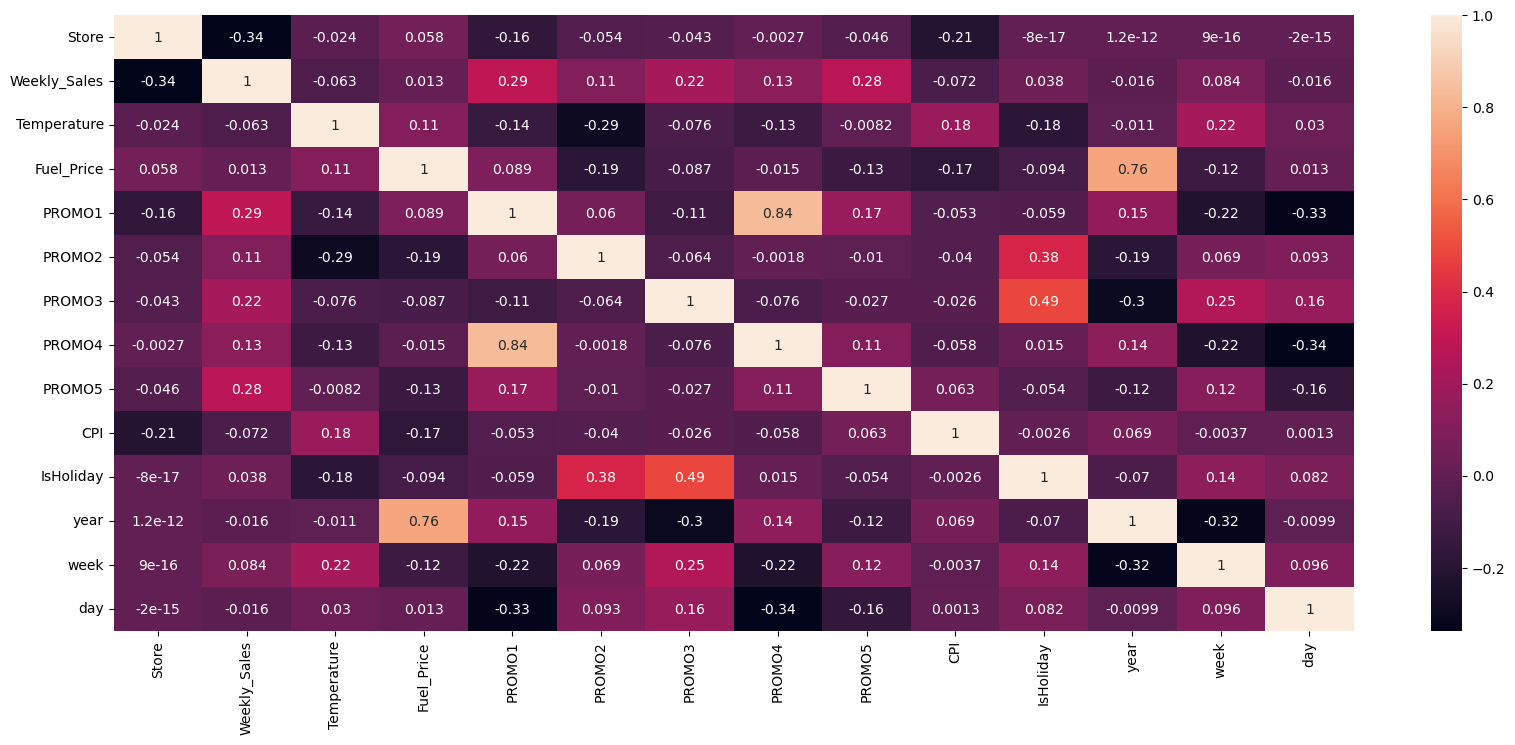

In [23]:
a=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(a, annot=True)

In [92]:
df_weeks=df.groupby('week').sum()
import plotly.express as px
fig=px.line(df_weeks,x=df_weeks.index, y='Weekly_Sales', title="sales based on weeks")
fig.show()

In [25]:
def scatter(data, feature):
    plt.figure()
    plt.scatter(data[feature], data['Weekly_Sales'])
    plt.ylabel('Weekly Sales')
    plt.xlabel(feature)

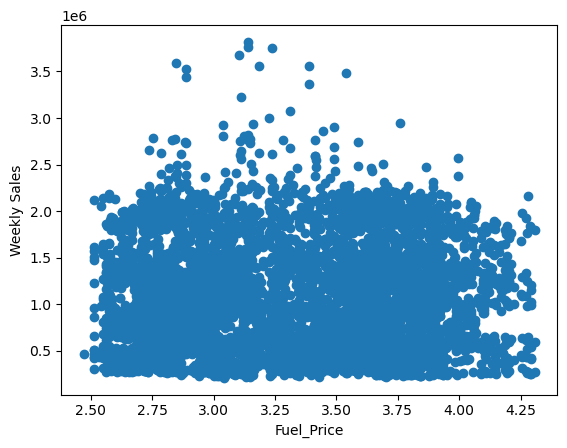

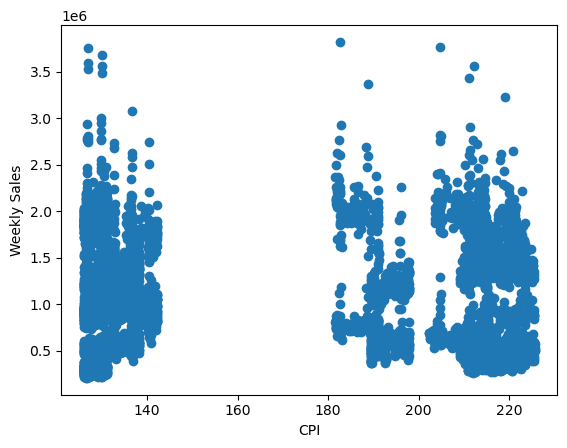

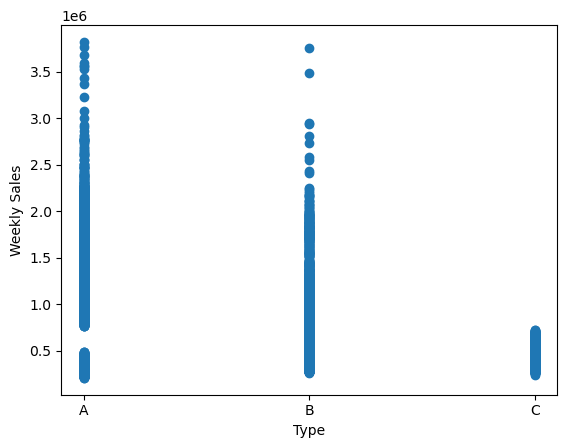

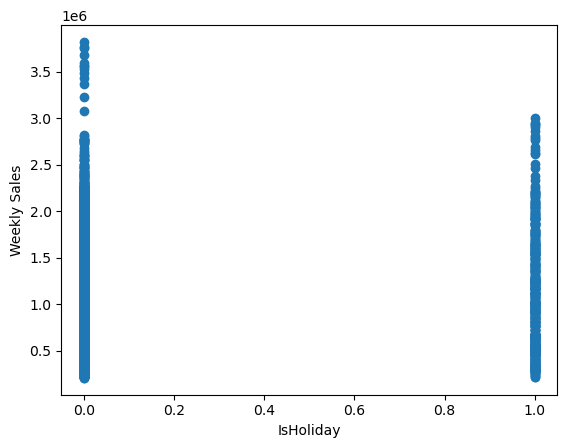

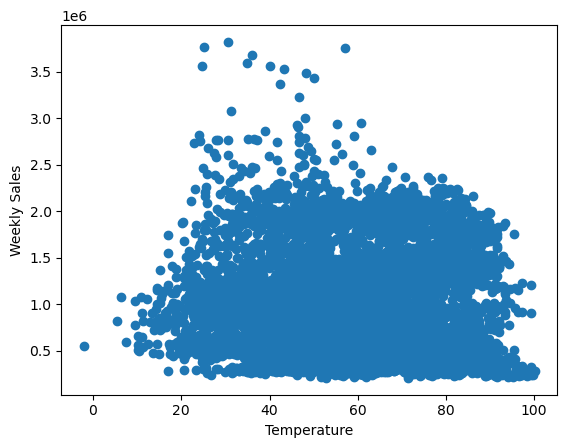

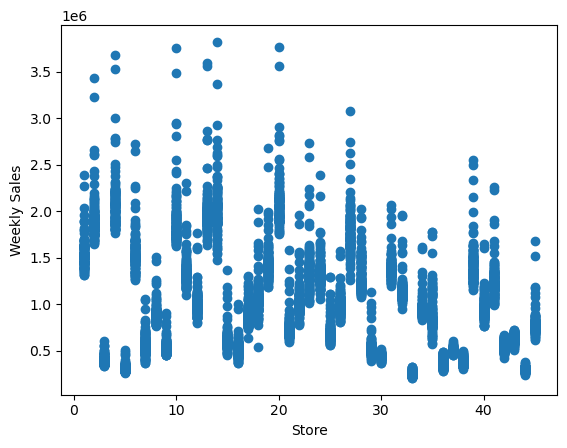

In [26]:
a=['Fuel_Price','CPI','Type', 'IsHoliday','Temperature','Store']
for i in a:
    scatter(df, i)

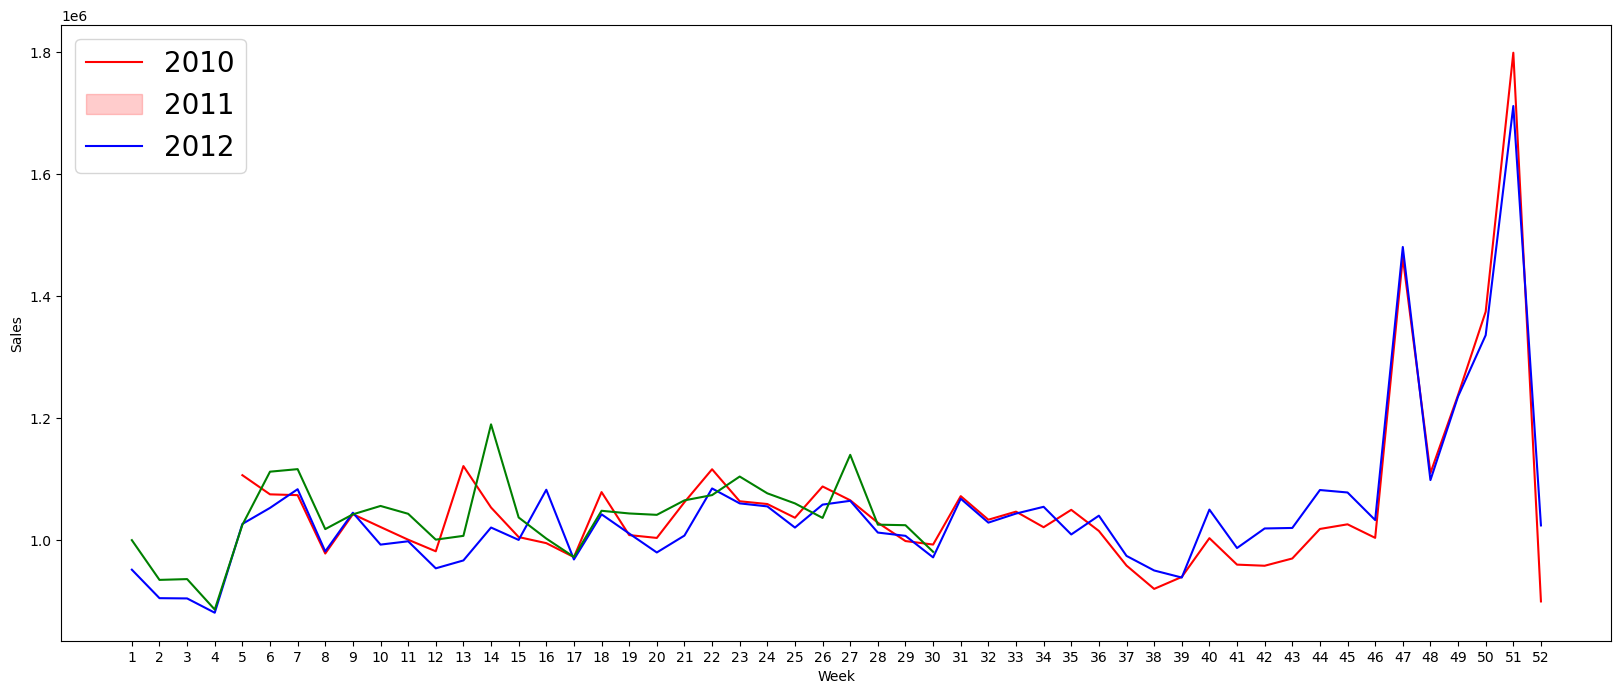

In [27]:
week_2010= df[df.year==2010]['Weekly_Sales'].groupby(df['week']).mean()
week_2011= df[df.year==2011]['Weekly_Sales'].groupby(df['week']).mean()
week_2012= df[df.year==2012]['Weekly_Sales'].groupby(df['week']).mean()

ax=plt.figure(figsize=(20,8))
sns.lineplot(x=week_2010.index, y=week_2010.values, color='red')
sns.lineplot(x=week_2011.index, y=week_2011.values, color='blue')
sns.lineplot(x=week_2012.index, y=week_2012.values, color='green')

plt.xticks(np.arange(1,53, step=1))
plt.legend(['2010','2011','2012'], fontsize=20)
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

In [28]:
# 2010 is green

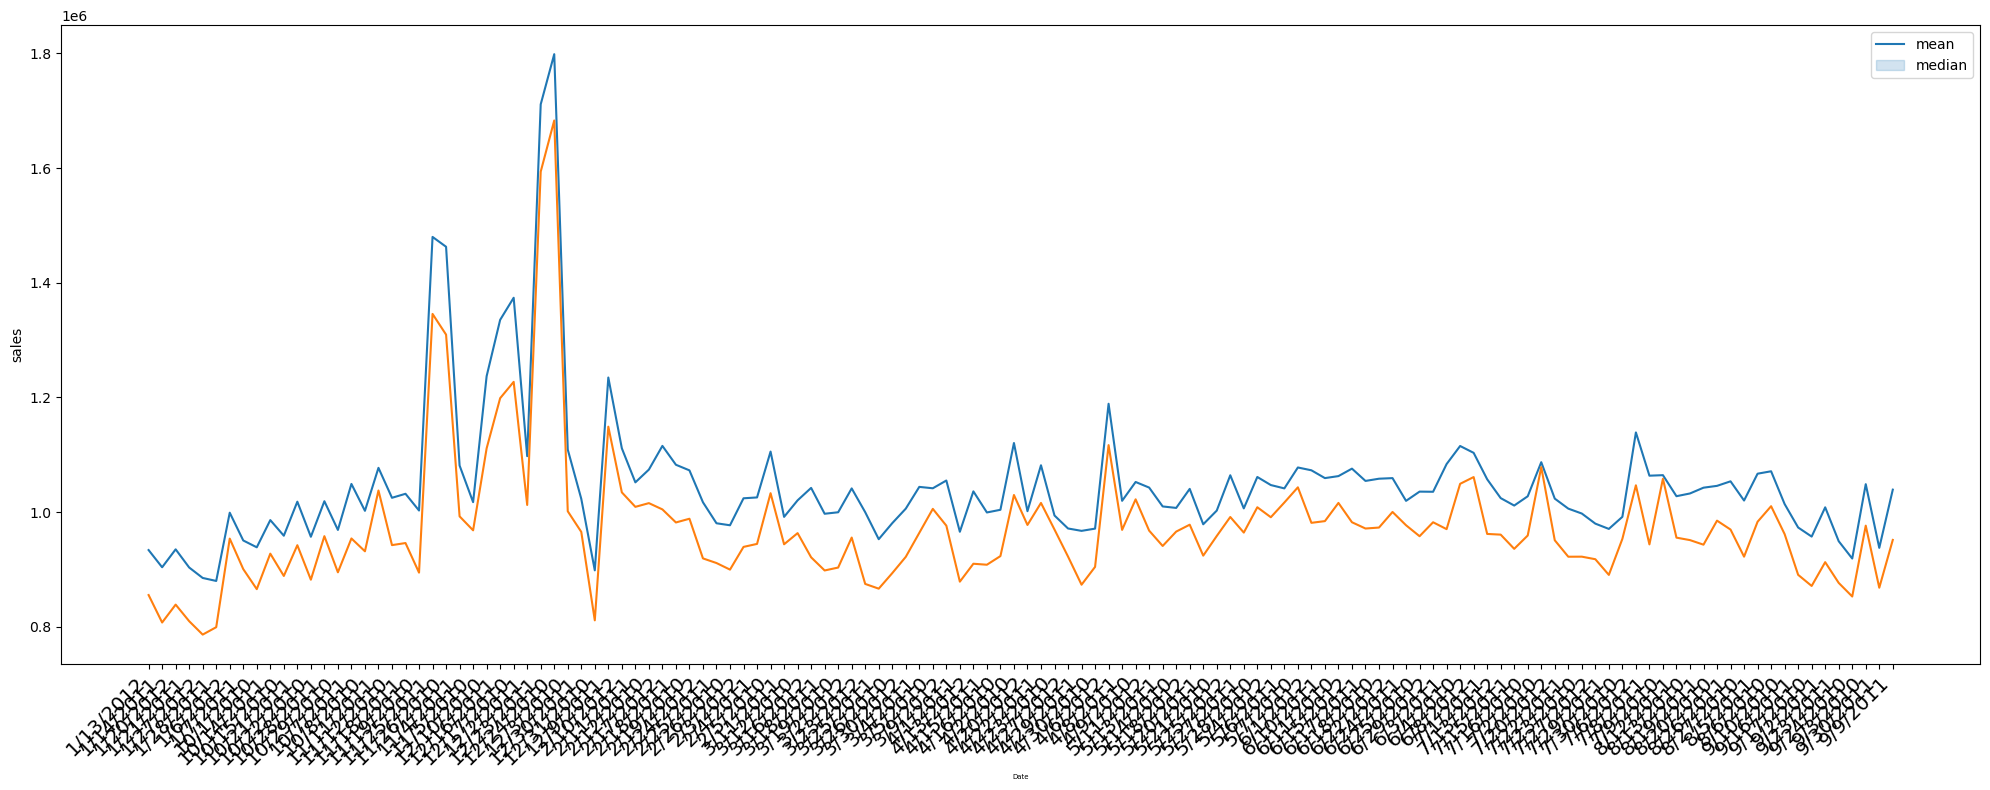

In [29]:
week_mean=df['Weekly_Sales'].groupby(df['Date']).mean()
week_median=df['Weekly_Sales'].groupby(df['Date']).median()
plt.figure(figsize=(20,8))

sns.lineplot(x=week_mean.index,y= week_mean.values)
sns.lineplot(x=week_median.index, y=week_median.values)
plt.legend(['mean','median'])
plt.xlabel('Date', fontsize=5)
plt.ylabel('sales')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)



plt.tight_layout()
plt.show()


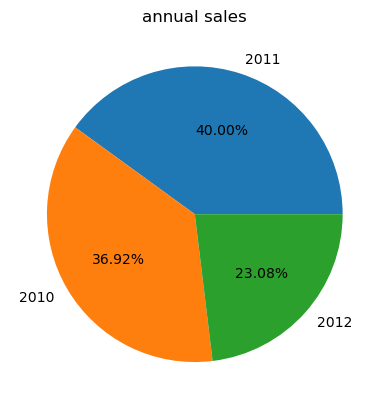

In [30]:
plt.pie(df['year'].value_counts().values, labels=df['year'].value_counts().index, autopct='%1.2f%%')
plt.title('annual sales')
plt.show()

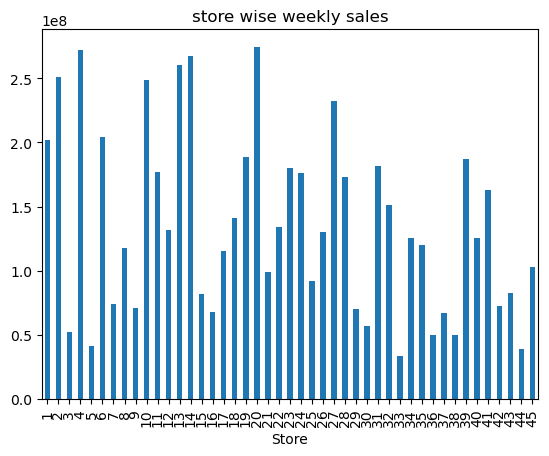

In [31]:
df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('store wise weekly sales')
plt.show()

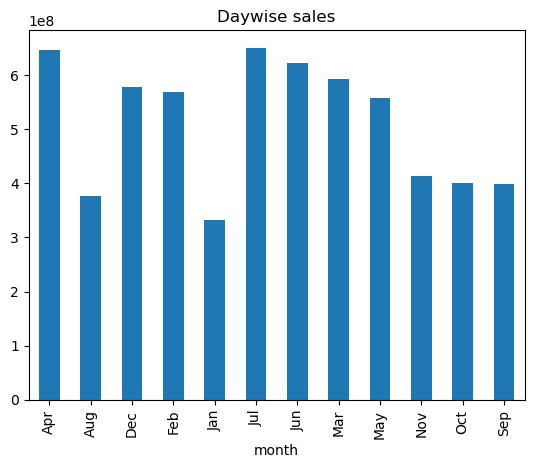

In [32]:
df.groupby('month')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Daywise sales')
plt.show()

### Feature Engineering

In [33]:
# Outlier removal

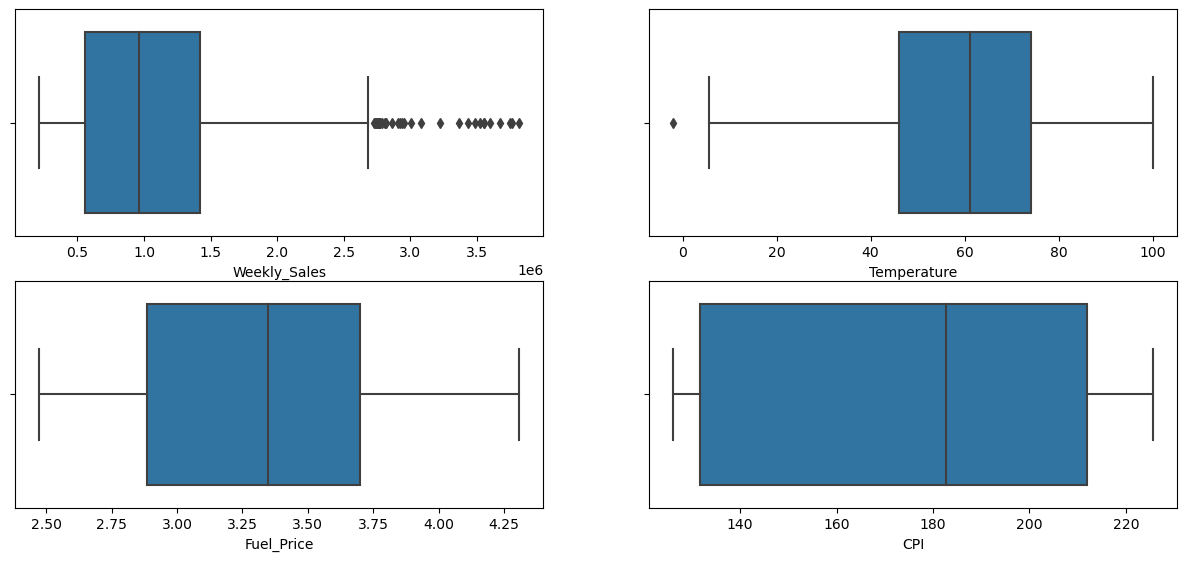

In [34]:
n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)


In [35]:
l = ["Weekly_Sales","Temperature"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

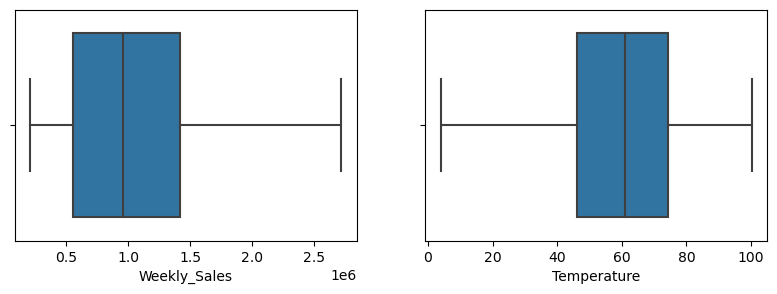

In [36]:
n = 1
cols =["Weekly_Sales","Temperature"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [37]:
# Treating missing values

In [38]:
df.PROMO1=df.PROMO1.map(lambda x: np.nan if x==-500 else x)
df.PROMO2=df.PROMO2.map(lambda x: np.nan if x==-500 else x)
df.PROMO3=df.PROMO3.map(lambda x: np.nan if x==-500 else x)
df.PROMO4=df.PROMO4.map(lambda x: np.nan if x==-500 else x)
df.PROMO5=df.PROMO5.map(lambda x: np.nan if x==-500 else x)


In [39]:
missing_cols = ['PROMO1','PROMO2','PROMO3','PROMO4','PROMO5']


impute_cols = [c for c in df.columns if not c in ['Weekly_Sales','date','Date','Type','month']+missing_cols]
data_imputed=df.copy()

In [40]:
def find_best_k_reg(X, y, k_min=1, k_max=51, step=2, cv=10):
    k_range = range(k_min, k_max+1, step)
    r2s = []
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv)
        r2s.append(np.mean(scores))
    print ("Best R2 value:",np.max(r2s),"\nBest k: ",np.argmax(k_range))
    return np.argmax(k_range)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict


impute_missing = df.loc[df.PROMO1.isnull(), :]
impute_valid = df.loc[~df.PROMO1.isnull(), :]

y = impute_valid.PROMO1.values
X = impute_valid[impute_cols]
ss = StandardScaler()

Xs = ss.fit_transform(X)

In [42]:
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

PROMO1_IMPUTE = knn.predict(X_miss_s)

data_imputed.loc[df.PROMO1.isnull(), 'PROMO1'] = PROMO1_IMPUTE


Best R2 value: 0.2786570708647355 
Best k:  25


In [43]:
impute_missing = df.loc[df.PROMO2.isnull(), :]
impute_valid = df.loc[~df.PROMO2.isnull(), :]

y = impute_valid.PROMO2.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

PROMO2_impute = knn.predict(X_miss_s)

data_imputed.loc[df.PROMO2.isnull(), 'PROMO2'] = PROMO2_impute



Best R2 value: 0.476830341576573 
Best k:  25


In [44]:
impute_missing = df.loc[df.PROMO3.isnull(), :]
impute_valid = df.loc[~df.PROMO3.isnull(), :]

y = impute_valid.PROMO3.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown3_impute = knn.predict(X_miss_s)

data_imputed.loc[df.PROMO3.isnull(), 'PROMO3'] = MarkDown3_impute



Best R2 value: 0.19110231533350958 
Best k:  25


In [45]:
impute_missing = df.loc[df.PROMO4.isnull(), :]
impute_valid = df.loc[~df.PROMO4.isnull(), :]

y = impute_valid.PROMO4.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown4_impute = knn.predict(X_miss_s)

data_imputed.loc[df.PROMO4.isnull(), 'PROMO4'] = MarkDown4_impute



Best R2 value: 0.4560599197153447 
Best k:  25


In [46]:
impute_missing = df.loc[df.PROMO5.isnull(), :]
impute_valid = df.loc[~df.PROMO5.isnull(), :]

y = impute_valid.PROMO5.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown5_impute = knn.predict(X_miss_s)

data_imputed.loc[df.PROMO5.isnull(), 'PROMO5'] = MarkDown5_impute

Best R2 value: -0.15026607554149315 
Best k:  25


In [47]:
df2=data_imputed.copy()

In [48]:
df2.head()

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.2900,8025.8700,42.2400,453.0800,3719.3800,219.892526,0,2012-01-13,2012,Jan,2,13
1,1,1/14/2011,1391013.96,A,35.40,2.983,4688.5968,9324.3084,42.9312,1606.1248,3905.1472,211.457411,0,2011-01-14,2011,Jan,2,14
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.8700,2807.1900,33.8800,500.6200,3400.2100,219.985689,0,2012-01-20,2012,Jan,3,20
3,1,1/21/2011,1327405.42,A,44.04,3.016,3113.8204,3028.7340,40.4336,431.9132,3859.1548,211.827234,0,2011-01-21,2011,Jan,3,21
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.4600,1082.7400,44.0000,11.0000,1222.1900,220.078852,0,2012-01-27,2012,Jan,4,27


In [55]:
df2.shape

(5850, 18)

In [49]:
df2.to_csv('df2.csv')

In [50]:
df3=pd.read_csv('df2.csv')

In [51]:
df3.head()

,Unnamed: 0,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.2900,8025.8700,42.2400,453.0800,3719.3800,219.892526,0,2012-01-13,2012,Jan,2,13
1,1,1,1/14/2011,1391013.96,A,35.40,2.983,4688.5968,9324.3084,42.9312,1606.1248,3905.1472,211.457411,0,2011-01-14,2011,Jan,2,14
2,2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.8700,2807.1900,33.8800,500.6200,3400.2100,219.985689,0,2012-01-20,2012,Jan,3,20
3,3,1,1/21/2011,1327405.42,A,44.04,3.016,3113.8204,3028.7340,40.4336,431.9132,3859.1548,211.827234,0,2011-01-21,2011,Jan,3,21
4,4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.4600,1082.7400,44.0000,11.0000,1222.1900,220.078852,0,2012-01-27,2012,Jan,4,27


### Time Series modeling

In [52]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [53]:
decomposition = sm.tsa.seasonal_decompose(x=df['Weekly_Sales'], period=12)

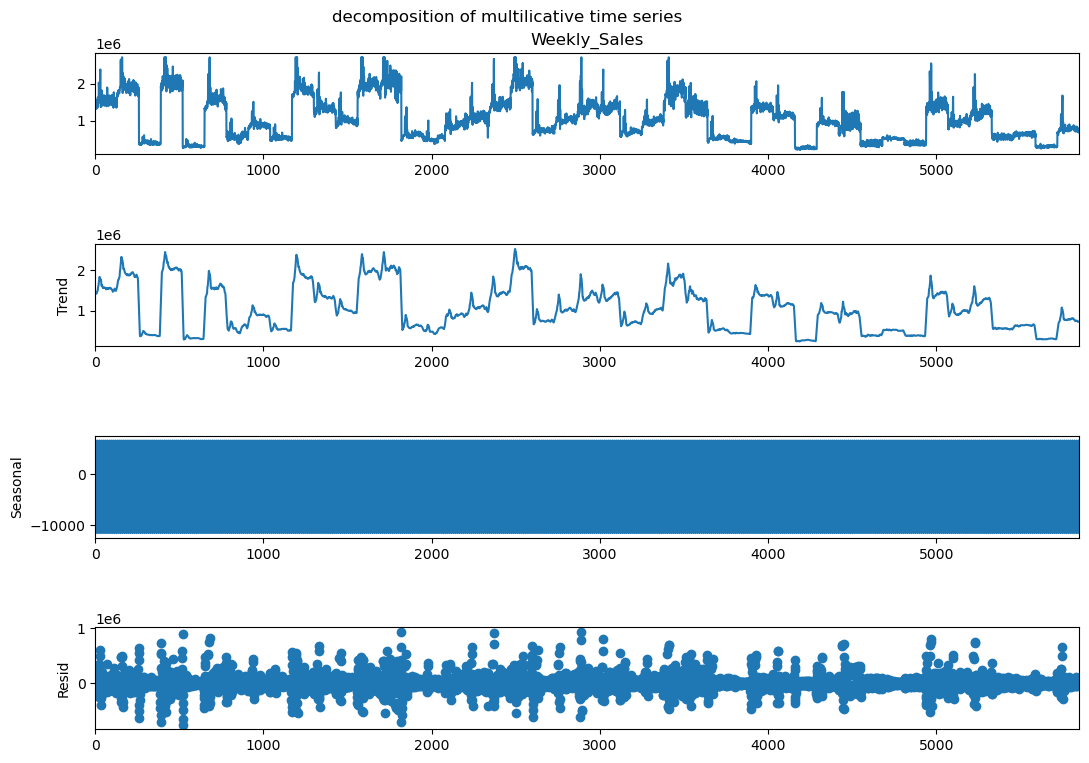

In [54]:
fig=decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('decomposition of multilicative time series')
plt.show()

### Exploring different Models

In [56]:
from time import strptime
df2['month_number'] = [strptime(str(x), '%b').tm_mon for x in df2['month']]

In [69]:
df3.head()

,Unnamed: 0,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.2900,8025.8700,42.2400,453.0800,3719.3800,219.892526,0,2012-01-13,2012,Jan,2,13
1,1,1,1/14/2011,1391013.96,A,35.40,2.983,4688.5968,9324.3084,42.9312,1606.1248,3905.1472,211.457411,0,2011-01-14,2011,Jan,2,14
2,2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.8700,2807.1900,33.8800,500.6200,3400.2100,219.985689,0,2012-01-20,2012,Jan,3,20
3,3,1,1/21/2011,1327405.42,A,44.04,3.016,3113.8204,3028.7340,40.4336,431.9132,3859.1548,211.827234,0,2011-01-21,2011,Jan,3,21
4,4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.4600,1082.7400,44.0000,11.0000,1222.1900,220.078852,0,2012-01-27,2012,Jan,4,27


In [58]:
x=df3.drop(['Weekly_Sales','date','Date','Type','month','PROMO4','Fuel_Price','day','PROMO3'],axis=1)
y=df3['Weekly_Sales']

In [59]:
x.head()

,Unnamed: 0,Store,Temperature,PROMO1,PROMO2,PROMO5,CPI,IsHoliday,year,week
0,0,1,48.53,5183.2900,8025.8700,3719.3800,219.892526,0,2012,2
1,1,1,35.40,4688.5968,9324.3084,3905.1472,211.457411,0,2011,2
2,2,1,54.11,4139.8700,2807.1900,3400.2100,219.985689,0,2012,3
3,3,1,44.04,3113.8204,3028.7340,3859.1548,211.827234,0,2011,3
4,4,1,54.26,1164.4600,1082.7400,1222.1900,220.078852,0,2012,4


In [60]:
y.head()

0    1459601.17
1    1391013.96
2    1394393.84
3    1327405.42
4    1319325.59
Name: Weekly_Sales, dtype: float64

In [61]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [64]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [65]:
def calculate_mape(actual, predicted):
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.abs((actual - predicted) / actual)
        mape[actual == 0] = 0.0001  # Replace zero actual values with 0.0001 to avoid inf
        mape = np.mean(mape) * 100
    return mape


In [66]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')
    print(f'MAPE:{calculate_mape(y_test, y_pred)}')

In [67]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 253924959528.84146
MAE: 417073.73155257356
R2 : 19.31 %
MAPE:57.12200465134571
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 254001187168.5313
MAE: 417143.25425701507
R2 : 19.28 %
MAPE:57.17648305034726
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 253962779898.2369
MAE: 417110.3057818311
R2 : 19.29 %
MAPE:57.14977042265671
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 258147398555.49536
MAE: 422349.04060691333
R2 : 17.96 %
MAPE:58.322413329723666
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 11718836913.027063
MAE: 58992.087191965795
R2 : 96.28 %
MAPE:5.465977775676733
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 18295342592.07123
MAE: 74166.6891

[None, None, None, None, None, None, None, None]

In [98]:
# Random forest gives greater accuracy, so let's proceed with that

In [68]:
model1 = RandomForestRegressor(n_estimators=100,random_state=42, max_features=6)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
r2_score(y_test,y_pred)
print(f'MAPE:{calculate_mape(y_test, y_pred)}')

MAPE:5.678367920016806


In [81]:
l=pd.read_excel('hack.xlsx')
l.head()

,Unnamed: 0,Store,Temperature,PROMO1,PROMO2,PROMO5,CPI,IsHoliday,year,week
0,1,1,86.11,27584.78,119.98,4661.71,221.949864,0,2012,31
1,2,2,90.22,27650.68,164.58,6652.98,221.586980,0,2012,31
2,3,3,86.55,5683.49,37.20,639.29,225.463633,0,2012,31
3,4,4,83.86,29127.20,42.27,10925.99,130.737871,0,2012,31
4,5,5,86.91,7365.26,14.48,2517.31,222.538511,0,2012,31


In [88]:
y_pred = model1.predict(l)
a=(y_pred)
print(a)
#print(f'MAPE:{calculate_mape(y_test, y_pred)}')

[ 572136.6979 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
  997276.3643 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1053113.693  1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7954 1015418.7954 1015418.7954 1015418.7954 1015418.7954
 1015418.7

In [90]:
print(type(a))

<class 'numpy.ndarray'>


In [91]:

for i in a:
    print(i)

572136.6978999998
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
997276.3643000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.7954000002
1015418.795400